# Домашнее задание

In [72]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

import seaborn as sns

from matplotlib import pyplot as plt

Пользуясь новыми знаниями, проведите эксплоративный анализ данных на данных недвижимости Бостона, и попытайтесь обучить линейную модель наиболее качественно. Все ваши действия и решения описывайте в markdown.

Данные вы сможете получить исполнив следующий код:

In [73]:
data = pd.read_csv(load_boston()['filename'], skiprows=1)
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


Переменная, которую надо предсказать - ’MEDV’.
Прочитать информацию о содержимом датасета:

In [74]:
# print(load_boston()['DESCR'])

Attribute Information (in order):
 - CRIM     per capita crime rate by town 
 - ZN       proportion of residential land zoned for lots over 25,000 sq.ft. 
 - INDUS    proportion of non-retail business acres per town 
 - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 - NOX      nitric oxides concentration (parts per 10 million)
 - RM       average number of rooms per dwelling
 - AGE      proportion of owner-occupied units built prior to 1940
 - DIS      weighted distances to five Boston employment centres
 - RAD      index of accessibility to radial highways
 - TAX      full-value property-tax rate per 10,000
 - PTRATIO  pupil-teacher ratio by town
 - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 - LSTAT    % lower status of the population
 - MEDV     Median value of owner-occupied homes in $1000's

In [75]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Целевой параметр MEDV

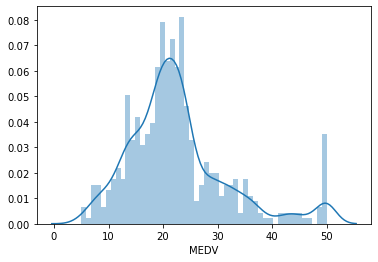

In [76]:
sns.distplot(data['MEDV'], 50)
plt.show()

In [77]:
data['MEDV'].value_counts().sort_index().tail(10)

43.8     1
44.0     1
44.8     1
45.4     1
46.0     1
46.7     1
48.3     1
48.5     1
48.8     1
50.0    16
Name: MEDV, dtype: int64

In [78]:
# считаем строки с MEDV = 50 аномальными, возможно они относятся к другому датасету
# удалим эти строки из выборки
data = data.query('MEDV != 50.0')

### Параметр CRIM

In [79]:
# sns.distplot(data['CRIM'], 50)
# plt.show()

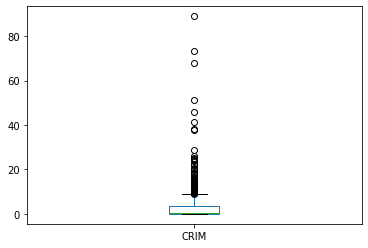

In [80]:
data['CRIM'].plot(kind='box')

In [81]:
# удалим выборосы
data['CRIM'].quantile(0.95)

15.868055

In [82]:
data.shape, data[data['CRIM'] < data['CRIM'].quantile(0.95)].shape

((490, 14), (465, 14))

In [83]:
data = data[data['CRIM'] < data['CRIM'].quantile(0.95)]

In [84]:
# округлим значения до сотых
data.loc[:, 'CRIM'] = data['CRIM'].round(decimals=2)

### Параметр ZN

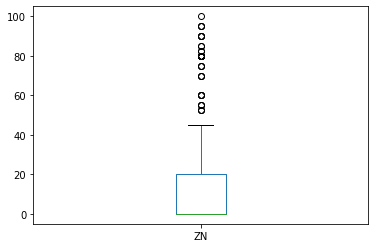

In [85]:
data['ZN'].plot(kind='box')

In [86]:
# удалим выборосы
data['ZN'].quantile(0.95)

80.0

In [87]:
data.shape, data[data['ZN'] < data['ZN'].quantile(0.95)].shape

((465, 14), (439, 14))

In [88]:
data = data[data['ZN'] < data['ZN'].quantile(0.95)]

### Параметр INDUS

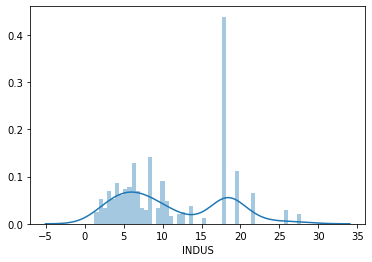

In [89]:
sns.distplot(data['INDUS'], 50)
plt.show()

In [90]:
# data['INDUS'].value_counts()

In [91]:
# удалим значения с малым количеством повторений
small_index = list(data['INDUS'].value_counts()[data['INDUS'].value_counts() < 2].index)

In [92]:
len(data[data['INDUS'].isin(small_index)])

6

In [93]:
data = data[~data['INDUS'].isin(small_index)]

### Параметр CHAS

In [94]:
data['CHAS'].value_counts()

0    404
1     29
Name: CHAS, dtype: int64

### Параметр NOX

In [95]:
data['NOX'].value_counts()

0.538    22
0.713    18
0.437    17
0.871    16
0.624    15
         ..
0.429     2
0.659     1
0.575     1
0.668     1
0.631     1
Name: NOX, Length: 68, dtype: int64

In [96]:
# округлим значения до сотых
data['NOX'] = data['NOX'].round(decimals=2)

### Параметр RM

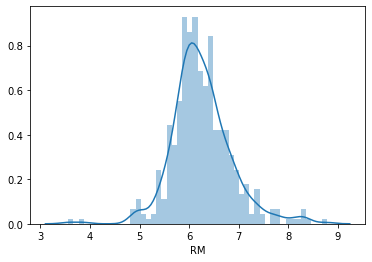

In [97]:
sns.distplot(data['RM'], 50)
plt.show()

In [98]:
data['RM'].value_counts()

6.127    3
5.713    3
6.167    3
6.417    3
6.229    3
        ..
5.942    1
5.850    1
6.433    1
8.398    1
6.625    1
Name: RM, Length: 386, dtype: int64

In [99]:
# округлим значения до сотых
data['RM'] = data['RM'].round(decimals=2)

### Параметр AGE

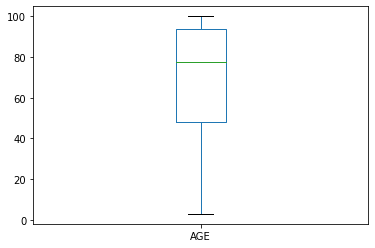

In [100]:
data['AGE'].plot(kind='box')

In [101]:
# удалим выборосы
data['AGE'].quantile(0.03)

9.996

In [102]:
data.shape, data[data['AGE'] > data['AGE'].quantile(0.03)].shape

((433, 14), (420, 14))

In [103]:
data = data[data['AGE'] > data['AGE'].quantile(0.03)]

### Параметр DIS

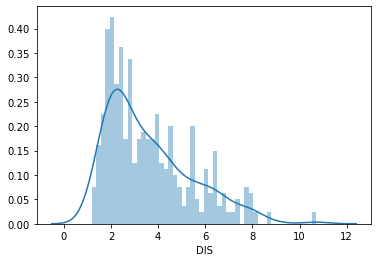

In [104]:
sns.distplot(data['DIS'], 50)
plt.show()

In [105]:
data['DIS'].value_counts()

3.4952    5
6.8147    4
5.4007    4
5.4917    3
7.3172    3
         ..
3.2628    1
2.7227    1
3.1025    1
1.3459    1
1.8125    1
Name: DIS, Length: 350, dtype: int64

In [106]:
# округлим значения до сотых
data['DIS'] = data['DIS'].round(decimals=2)

In [107]:
data['DIS'].value_counts()

5.40    6
7.83    5
3.50    5
1.82    5
2.11    4
       ..
4.27    1
3.84    1
2.28    1
1.41    1
2.46    1
Name: DIS, Length: 246, dtype: int64

### Параметр RAD

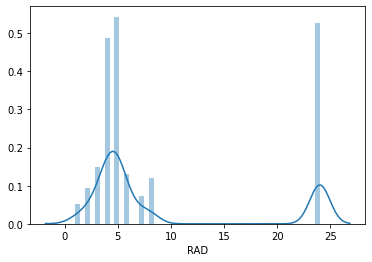

In [108]:
sns.distplot(data['RAD'], 50)
plt.show()

In [109]:
data['RAD'].value_counts()

5     105
24    102
4      94
3      29
6      25
8      23
2      18
7      14
1      10
Name: RAD, dtype: int64

In [110]:
# создадим новый категориальный признак high_RAD 
# 0 - RAD меньше 20; 1 - RAD больше 20
data['high_RAD'] = data.apply(lambda x: 1 if x['RAD']>20 else 0, axis=1)

### Параметр TAX

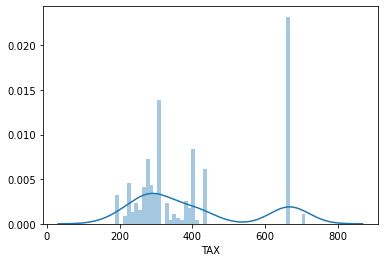

In [111]:
sns.distplot(data['TAX'], 50)
plt.show()

In [112]:
# data['TAX'].value_counts()

In [113]:
# считаем что значение 666 аномально, приравняем его ко второму по популярности значению - 307
data['TAX'][data['TAX'] == 666] = 307

C:\Users\User\Anaconda4\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [114]:
# удалим значения с малым количеством повторений
small_index = list(data['TAX'].value_counts()[data['TAX'].value_counts() < 3].index)
len(data[data['TAX'].isin(small_index)])

14

In [115]:
data = data[~data['TAX'].isin(small_index)]

In [116]:
# создадим новый категориальный признак high_TAX
# 0 - TAX меньше 600; 1 - TAX больше 600
data.loc[:, 'high_TAX'] = data.apply(lambda x: 1 if x['TAX']>600 else 0, axis=1)

### Параметр B

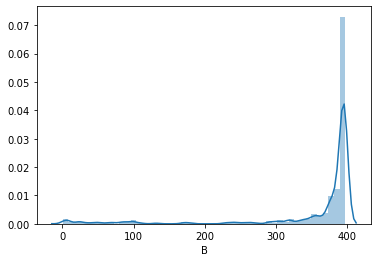

In [117]:
sns.distplot(data['B'], 50)
plt.show()

In [118]:
# удалим выборосы
data['B'].quantile(0.05)

84.59

In [119]:
data.shape, data[data['B'] > data['B'].quantile(0.05)].shape

((406, 16), (385, 16))

In [120]:
data = data[data['B'] > data['B'].quantile(0.05)]

### Параметр LSTAT

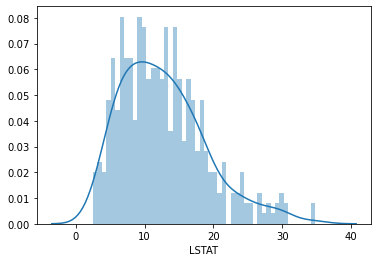

In [121]:
sns.distplot(data['LSTAT'], 50)
plt.show()

# Обучение модели

In [122]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,high_RAD,high_TAX
3,0.03,0.0,2.18,0,0.46,7.00,45.8,6.06,3,222,18.7,394.63,2.94,33.4,0,0
4,0.07,0.0,2.18,0,0.46,7.15,54.2,6.06,3,222,18.7,396.90,5.33,36.2,0,0
5,0.03,0.0,2.18,0,0.46,6.43,58.7,6.06,3,222,18.7,394.12,5.21,28.7,0,0
6,0.09,12.5,7.87,0,0.52,6.01,66.6,5.56,5,311,15.2,395.60,12.43,22.9,0,0
7,0.14,12.5,7.87,0,0.52,6.17,96.1,5.95,5,311,15.2,396.90,19.15,27.1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06,0.0,11.93,0,0.57,6.59,69.1,2.48,1,273,21.0,391.99,9.67,22.4,0,0
502,0.05,0.0,11.93,0,0.57,6.12,76.7,2.29,1,273,21.0,396.90,9.08,20.6,0,0
503,0.06,0.0,11.93,0,0.57,6.98,91.0,2.17,1,273,21.0,396.90,5.64,23.9,0,0
504,0.11,0.0,11.93,0,0.57,6.79,89.3,2.39,1,273,21.0,393.45,6.48,22.0,0,0


In [123]:
# входные данные
X = data.drop(['MEDV'], axis=1)
# вектор целевых значений
y = data['MEDV']

In [124]:
def teach_model(X, y):
    # делим выборку на test и train
    X_train, X_test, y_train, y_test = train_test_split(X, y)

    # обучаем модель
    lin_reg = LinearRegression()
    lin_reg.fit(X_train, y_train)

    # обучаемое предсказание
    train_predict = lin_reg.predict(X_train)
    test_predict = lin_reg.predict(X_test)

    # сравнение предсказания и реального результата
    print('Train MAE: {}'.format(mean_absolute_error(train_predict, y_train)))
    print('Test MAE: {}'.format(mean_absolute_error(test_predict, y_test)))
    print('----------------------------')

    # отсортируем параметры по весам
    sort_ind = np.argsort(np.abs(lin_reg.coef_))[::-1]
    for x, y in zip(lin_reg.coef_[sort_ind], X.columns[sort_ind]):
        print('{}: {}'.format(x, y))
        
teach_model(X, y)

Train MAE: 2.5597630342206483
Test MAE: 2.7282047118999717
----------------------------
-14.767943409654588: NOX
-9.10998834139207: high_RAD
5.393823183705487: high_TAX
3.7992246625691606: RM
-1.5066791520785816: DIS
-0.9100769583785012: PTRATIO
0.5112318956381705: RAD
-0.42107282845553146: LSTAT
-0.21023962198565815: CRIM
-0.05228464618895827: INDUS
0.022176669548852414: CHAS
-0.019582888754127906: AGE
-0.01911542065076288: TAX
-0.0005575709105788695: ZN
-0.0004217357258200771: B


In [125]:
row_data = pd.read_csv(load_boston()['filename'], skiprows=1)

In [126]:
# входные данные
X = row_data.drop(['MEDV'], axis=1)
# вектор целевых значений
y = row_data['MEDV']

In [127]:
teach_model(X, y)

Train MAE: 3.478923722984327
Test MAE: 3.087849672324417
----------------------------
-18.925310514011997: NOX
4.1183888585500394: RM
2.708072326959837: CHAS
-1.5938843872663153: DIS
-0.9770907487723635: PTRATIO
-0.5299072525560276: LSTAT
0.38345176426231325: RAD
-0.11311420960624485: CRIM
0.04274832335387575: ZN
0.023083190824394667: INDUS
-0.013851662875028571: TAX
0.010839758663483124: B
-0.00036554725415914157: AGE


**Изменения во 2 итерации**
   * значения TAX = 666 привел ко второму по популярности значению 307. Не стал удалять строки, так как их было много
   * удалил строки со значением MEDV = 50, так как они выбивались из нормального распределения